In [1]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pp


In [2]:
# open up the csv file as a pandas dataframe

d1718 = pd.read_csv('18-19.csv')

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr
0,Celgene,Modesta Koyle,CELG,20/11/2018,66.750,USD
1,Aston Martin,Radek Kucera,AML.L,20/11/2018,1595.000,GBX
2,PayPal,Jan Von Stein,PYPL,27/11/2018,81.970,USD
3,Disney,Linh Tran,DIS,27/11/2018,113.900,USD
4,Volkswagen,Andre da Silva,VOW3.DE,04/12/2018,148.120,EUR
5,T-Mobile,Phillip Rbk,TMUS,04/12/2018,66.570,USD
6,Biogen,Arjun Kandola,BIIB,11/12/2018,322.610,USD
7,Norway Royal Salmon,Harald Salmon,NRS.OL,11/12/2018,181.370,NOK
8,Medtronic,Masamba Senghore,MDT,08/01/2019,83.030,USD
9,ATOS,Jeremy Obadia,ATOS,08/01/2019,1.230,EUR


In [3]:
d1718['Ticker']

0        CELG
1       AML.L
2        PYPL
3         DIS
4     VOW3.DE
5        TMUS
6        BIIB
7      NRS.OL
8         MDT
9        ATOS
10     UBI.PA
11     SIE.DE
12       GOOG
13       COST
14       NVDA
15     BMW.DE
16         KO
17       ADBE
18       SPOT
19    JUVE.MI
20     BEN.PA
21     SDRC.L
22      HGM.L
Name: Ticker, dtype: object

In [4]:
# example: show how we extract historic data 

data = yf.download('MSFT', start="2019-11-07", end="2019-11-08")

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,143.839996,144.880005,143.770004,144.259995,143.770782,17786700


In [5]:
data['Close'][0]

144.25999450683594

In [6]:
# download prices for all the stocks today 

today = np.datetime64('today', 'D')
yesterday = today - 1
i = -1
prices = {}


for item in d1718['Ticker']:
    i += 1
    try:
        data = yf.download(item, start=yesterday, end=today)
        prices[i] = data['Close'][0]
    except: 
        prices[i] = 0
        continue

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
prices

{0: 108.23999786376953,
 1: 493.5,
 2: 101.7699966430664,
 3: 148.2899932861328,
 4: 177.0800018310547,
 5: 78.58999633789062,
 6: 299.0799865722656,
 7: 224.1999969482422,
 8: 110.81999969482422,
 9: 1.3899999856948853,
 10: 53.0,
 11: 114.77999877929688,
 12: 1295.3399658203125,
 13: 299.30999755859375,
 14: 210.88999938964844,
 15: 74.06999969482422,
 16: 53.029998779296875,
 17: 299.29998779296875,
 18: 140.88999938964844,
 19: 1.4114999771118164,
 20: 9.625,
 21: 2415.0,
 22: 183.60000610351562}

In [8]:
pricesdf = pd.Series(prices)
pricesdf = pricesdf.round(decimals=2,)

pricesdf

0      108.24
1      493.50
2      101.77
3      148.29
4      177.08
5       78.59
6      299.08
7      224.20
8      110.82
9        1.39
10      53.00
11     114.78
12    1295.34
13     299.31
14     210.89
15      74.07
16      53.03
17     299.30
18     140.89
19       1.41
20       9.62
21    2415.00
22     183.60
dtype: float64

In [9]:
d1718['Today Price'] = pricesdf

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price
0,Celgene,Modesta Koyle,CELG,20/11/2018,66.750,USD,108.24
1,Aston Martin,Radek Kucera,AML.L,20/11/2018,1595.000,GBX,493.50
2,PayPal,Jan Von Stein,PYPL,27/11/2018,81.970,USD,101.77
3,Disney,Linh Tran,DIS,27/11/2018,113.900,USD,148.29
4,Volkswagen,Andre da Silva,VOW3.DE,04/12/2018,148.120,EUR,177.08
5,T-Mobile,Phillip Rbk,TMUS,04/12/2018,66.570,USD,78.59
6,Biogen,Arjun Kandola,BIIB,11/12/2018,322.610,USD,299.08
7,Norway Royal Salmon,Harald Salmon,NRS.OL,11/12/2018,181.370,NOK,224.20
8,Medtronic,Masamba Senghore,MDT,08/01/2019,83.030,USD,110.82
9,ATOS,Jeremy Obadia,ATOS,08/01/2019,1.230,EUR,1.39


In [10]:
d1718['Price %'] = (d1718['Today Price'] - d1718['Pitch Price'])/d1718['Pitch Price']
d1718 = d1718.round(decimals=2)

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %
0,Celgene,Modesta Koyle,CELG,20/11/2018,66.75,USD,108.24,0.62
1,Aston Martin,Radek Kucera,AML.L,20/11/2018,1595.00,GBX,493.50,-0.69
2,PayPal,Jan Von Stein,PYPL,27/11/2018,81.97,USD,101.77,0.24
3,Disney,Linh Tran,DIS,27/11/2018,113.90,USD,148.29,0.30
4,Volkswagen,Andre da Silva,VOW3.DE,04/12/2018,148.12,EUR,177.08,0.20
5,T-Mobile,Phillip Rbk,TMUS,04/12/2018,66.57,USD,78.59,0.18
6,Biogen,Arjun Kandola,BIIB,11/12/2018,322.61,USD,299.08,-0.07
7,Norway Royal Salmon,Harald Salmon,NRS.OL,11/12/2018,181.37,NOK,224.20,0.24
8,Medtronic,Masamba Senghore,MDT,08/01/2019,83.03,USD,110.82,0.33
9,ATOS,Jeremy Obadia,ATOS,08/01/2019,1.23,EUR,1.39,0.13


In [11]:
#pd.to_numeric(d1718['Pitch Price'])

#d1718['Pitch Price'].dtype 

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


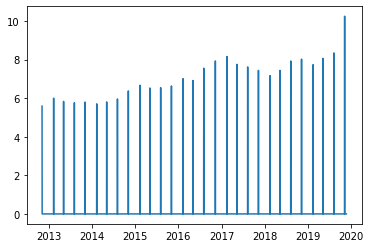

In [12]:
# example: show how we extract dividends

BP_Data = yf.Ticker("BP.L")

BP_Div = BP_Data.history(start="2012-11-07", end=today).Dividends

pp.plot(BP_Div)

In [13]:
sum(BP_Div)

204.58704000000003

In [14]:
divs = {}
i = -1

for item in d1718['Ticker']:
    i += 1
    try:
        div_date = str(d1718['Pitch Date'][i])
        year = div_date[-4:]
        month = div_date[3:-5]
        day = div_date[0:-8]
        div_date = year + '-' + month + '-' + day
        div_date = np.datetime64(div_date)   
        Div_Data = yf.Ticker(item)
        Total_Div = Div_Data.history(start=div_date, end=today).Dividends
        divs[i] = sum(Total_Div)
    except: 
        divs[i] = 0
        continue
        
divsdf = pd.Series(divs)
divsdf        

0       0.00
1       0.00
2       0.00
3       1.76
4       4.86
5       0.00
6       0.00
7       0.00
8       1.58
9       0.00
10      0.00
11      3.80
12      0.00
13      2.52
14      0.48
15      3.50
16      1.20
17      0.00
18      0.00
19      0.00
20      0.00
21    114.00
22      7.40
dtype: float64

In [15]:
d1718['Total Divs'] = divsdf

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %,Total Divs
0,Celgene,Modesta Koyle,CELG,20/11/2018,66.75,USD,108.24,0.62,0.00
1,Aston Martin,Radek Kucera,AML.L,20/11/2018,1595.00,GBX,493.50,-0.69,0.00
2,PayPal,Jan Von Stein,PYPL,27/11/2018,81.97,USD,101.77,0.24,0.00
3,Disney,Linh Tran,DIS,27/11/2018,113.90,USD,148.29,0.30,1.76
4,Volkswagen,Andre da Silva,VOW3.DE,04/12/2018,148.12,EUR,177.08,0.20,4.86
5,T-Mobile,Phillip Rbk,TMUS,04/12/2018,66.57,USD,78.59,0.18,0.00
6,Biogen,Arjun Kandola,BIIB,11/12/2018,322.61,USD,299.08,-0.07,0.00
7,Norway Royal Salmon,Harald Salmon,NRS.OL,11/12/2018,181.37,NOK,224.20,0.24,0.00
8,Medtronic,Masamba Senghore,MDT,08/01/2019,83.03,USD,110.82,0.33,1.58
9,ATOS,Jeremy Obadia,ATOS,08/01/2019,1.23,EUR,1.39,0.13,0.00


In [16]:
USD = yf.download('GBPUSD=X', start="2017-01-01", end=today)
EUR = yf.download('GBPEUR=X', start="2017-01-01", end=today)
CHF = yf.download('GBPCHF=X', start="2017-01-01", end=today)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
print(USD)

                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2017-01-02  1.234903  1.235941  1.228350  1.234903   1.234903       0
2017-01-03  1.228199  1.231072  1.220405  1.228199   1.228199       0
2017-01-04  1.224605  1.229710  1.222345  1.224560   1.224560       0
2017-01-05  1.232802  1.241773  1.227144  1.232681   1.232681       0
2017-01-06  1.242390  1.242390  1.230315  1.242545   1.242545       0
...              ...       ...       ...       ...        ...     ...
2019-11-18  1.291973  1.298212  1.291656  1.292123   1.292123       0
2019-11-19  1.294968  1.297185  1.292541  1.295085   1.295085       0
2019-11-20  1.292892  1.292892  1.289175  1.292950   1.292950       0
2019-11-21  1.292691  1.297017  1.290006  1.292708   1.292708       0
2019-11-22  1.291923  1.292992  1.282676  1.291990   1.291990       0

[751 rows x 6 columns]


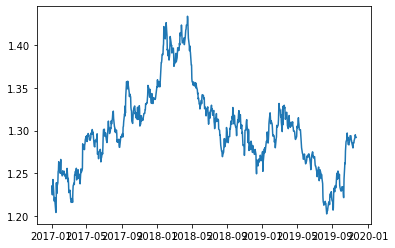

In [18]:
pp.plot(USD['Close'])

In [19]:
curr = {}
i = -1

for item in d1718['Curr']:
    i += 1
    curr_date = str(d1718['Pitch Date'][i])
    year = curr_date[-4:]
    month = curr_date[3:-5]
    day = curr_date[0:-8]
    curr_date = year + '-' + month + '-' + day
    curr_date = np.datetime64(curr_date) 
    
    if item == 'USD':
        USD_diff = 1 + (USD['Close'][curr_date] - USD['Close'][today-1])/USD['Close'][curr_date]
        curr[i] = USD_diff
    elif item == 'EUR':
        EUR_diff = 1 + (EUR['Close'][curr_date] - EUR['Close'][today-1])/EUR['Close'][curr_date]
        curr[i] = EUR_diff
    elif item == 'CHF':
        CHF_diff = 1 + (CHF['Close'][curr_date] - CHF['Close'][today-1])/CHF['Close'][curr_date]
        curr[i] = CHF_diff
    else: 
        curr[i] = 1
        
curr

{0: 0.995322937822438,
 1: 1,
 2: 0.9916020453051694,
 3: 0.9916020453051694,
 4: 0.9617355226488287,
 5: 0.9847545433613427,
 6: 0.9714469635369334,
 7: 1,
 8: 0.9895348091340576,
 9: 0.9552092215974742,
 10: 0.9630864251437607,
 11: 0.9735333286988771,
 12: 0.9978165187802687,
 13: 1.0182558480065864,
 14: 1.0182558480065864,
 15: 0.978758919639252,
 16: 1.0085270554776846,
 17: 1.0003230181219438,
 18: 0.9815033955295759,
 19: 0.9925622055210693,
 20: 0.9925622055210693,
 21: 1,
 22: 1}

In [20]:
currdf = pd.Series(curr)
currdf = currdf.round(decimals=2,)

currdf

0     1.00
1     1.00
2     0.99
3     0.99
4     0.96
5     0.98
6     0.97
7     1.00
8     0.99
9     0.96
10    0.96
11    0.97
12    1.00
13    1.02
14    1.02
15    0.98
16    1.01
17    1.00
18    0.98
19    0.99
20    0.99
21    1.00
22    1.00
dtype: float64

In [21]:
d1718['Currency Δ'] = currdf

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %,Total Divs,Currency Δ
0,Celgene,Modesta Koyle,CELG,20/11/2018,66.75,USD,108.24,0.62,0.00,1.00
1,Aston Martin,Radek Kucera,AML.L,20/11/2018,1595.00,GBX,493.50,-0.69,0.00,1.00
2,PayPal,Jan Von Stein,PYPL,27/11/2018,81.97,USD,101.77,0.24,0.00,0.99
3,Disney,Linh Tran,DIS,27/11/2018,113.90,USD,148.29,0.30,1.76,0.99
4,Volkswagen,Andre da Silva,VOW3.DE,04/12/2018,148.12,EUR,177.08,0.20,4.86,0.96
5,T-Mobile,Phillip Rbk,TMUS,04/12/2018,66.57,USD,78.59,0.18,0.00,0.98
6,Biogen,Arjun Kandola,BIIB,11/12/2018,322.61,USD,299.08,-0.07,0.00,0.97
7,Norway Royal Salmon,Harald Salmon,NRS.OL,11/12/2018,181.37,NOK,224.20,0.24,0.00,1.00
8,Medtronic,Masamba Senghore,MDT,08/01/2019,83.03,USD,110.82,0.33,1.58,0.99
9,ATOS,Jeremy Obadia,ATOS,08/01/2019,1.23,EUR,1.39,0.13,0.00,0.96


In [22]:
total = {}
i = -1

for today_price in d1718['Today Price']:
    i += 1
    pitch_price = d1718['Pitch Price'][i]
    total_divs = d1718['Total Divs'][i]
    currency_Δ = d1718['Currency Δ'][i]
    total[i] = (((today_price + total_divs) - pitch_price) * currency_Δ)/pitch_price

totaldf = pd.Series(total)
totaldf = totaldf.round(decimals=2,)

d1718['Total %'] = totaldf

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %,Total Divs,Currency Δ,Total %
0,Celgene,Modesta Koyle,CELG,20/11/2018,66.75,USD,108.24,0.62,0.00,1.00,0.62
1,Aston Martin,Radek Kucera,AML.L,20/11/2018,1595.00,GBX,493.50,-0.69,0.00,1.00,-0.69
2,PayPal,Jan Von Stein,PYPL,27/11/2018,81.97,USD,101.77,0.24,0.00,0.99,0.24
3,Disney,Linh Tran,DIS,27/11/2018,113.90,USD,148.29,0.30,1.76,0.99,0.31
4,Volkswagen,Andre da Silva,VOW3.DE,04/12/2018,148.12,EUR,177.08,0.20,4.86,0.96,0.22
5,T-Mobile,Phillip Rbk,TMUS,04/12/2018,66.57,USD,78.59,0.18,0.00,0.98,0.18
6,Biogen,Arjun Kandola,BIIB,11/12/2018,322.61,USD,299.08,-0.07,0.00,0.97,-0.07
7,Norway Royal Salmon,Harald Salmon,NRS.OL,11/12/2018,181.37,NOK,224.20,0.24,0.00,1.00,0.24
8,Medtronic,Masamba Senghore,MDT,08/01/2019,83.03,USD,110.82,0.33,1.58,0.99,0.35
9,ATOS,Jeremy Obadia,ATOS,08/01/2019,1.23,EUR,1.39,0.13,0.00,0.96,0.12


In [23]:
#d1718 = d1718.drop([6, 24])

d1718

,Name,Associate,Ticker,Pitch Date,Pitch Price,Curr,Today Price,Price %,Total Divs,Currency Δ,Total %
0,Celgene,Modesta Koyle,CELG,20/11/2018,66.75,USD,108.24,0.62,0.00,1.00,0.62
1,Aston Martin,Radek Kucera,AML.L,20/11/2018,1595.00,GBX,493.50,-0.69,0.00,1.00,-0.69
2,PayPal,Jan Von Stein,PYPL,27/11/2018,81.97,USD,101.77,0.24,0.00,0.99,0.24
3,Disney,Linh Tran,DIS,27/11/2018,113.90,USD,148.29,0.30,1.76,0.99,0.31
4,Volkswagen,Andre da Silva,VOW3.DE,04/12/2018,148.12,EUR,177.08,0.20,4.86,0.96,0.22
5,T-Mobile,Phillip Rbk,TMUS,04/12/2018,66.57,USD,78.59,0.18,0.00,0.98,0.18
6,Biogen,Arjun Kandola,BIIB,11/12/2018,322.61,USD,299.08,-0.07,0.00,0.97,-0.07
7,Norway Royal Salmon,Harald Salmon,NRS.OL,11/12/2018,181.37,NOK,224.20,0.24,0.00,1.00,0.24
8,Medtronic,Masamba Senghore,MDT,08/01/2019,83.03,USD,110.82,0.33,1.58,0.99,0.35
9,ATOS,Jeremy Obadia,ATOS,08/01/2019,1.23,EUR,1.39,0.13,0.00,0.96,0.12


In [24]:
d1718.to_csv(r'C:\Users\seanl\Documents\Coding\Citadel\18-19x.csv')